In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
def sigmoid(z):  
    return  1/(1+np.exp(-z))
#     return np.array(map(float,list(map(lambda x:1/(1+(np.e)**(-x)) , z))))
def getCost(h,y):
    return np.sum( (h-y)**2 )

def predict(x):
    X=x.copy()
    X =np.insert(X,0,1,axis=1) # insert the column
    X_h = sigmoid(np.matmul(X,weight1))
    X_h =np.insert(X_h,0,1,axis=1) # insert the column of ones
    h =   sigmoid(np.matmul(X_h,weight2))
    return h# np.array([1 if hi>=0.5 else 0 for hi in h])

('j0', 1.0059453732160857)
('j10000', 0.9999601673652001)
(array([[-0.09968768,  0.01035767],
       [ 0.10937913,  0.2458799 ],
       [ 0.04460409,  0.19344748]]), array([[-0.00546676],
       [ 0.14971001],
       [-0.12344566]]))
('cost', 0.9999601673652001)
[[ 0.          0.          0.50090445]
 [ 1.          0.          0.50004082]
 [ 0.          1.          0.49983407]
 [ 1.          1.          0.4990121 ]]


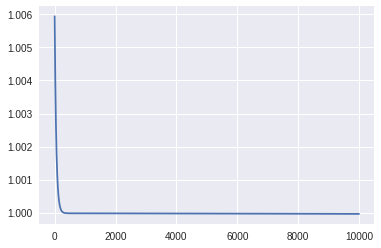

In [9]:
N_h=2

alpha=0.1
iters=10000
x= np.array([[0,0],[1,0],[0,1],[1,1],])
y = np.array([ 1,    0,    0,    1,]).reshape((4,1))

X=x.copy()
m,n=X.shape
X =np.insert(X,0,1,axis=1) # insert the column of ones

J_hist=[]
weight1 = np.random.randn(n+1,N_h)*0.1 #N+1 x N_h = 3 x 2
weight2 = np.random.randn(N_h+1,1)*0.1 #N_h+1 x 1 = 3 x 1
for it in range(iters+1):
    # ForwardProp
    X_h = sigmoid(np.matmul(X,weight1))
    X_h = np.insert(X_h,0,1,axis=1) # insert the column of ones
    h =   sigmoid(np.matmul(X_h,weight2))

    j=getCost(h,y)
    if(it%(10000)==0):
        print('j%d'%it,j)
    J_hist.append(j)

    deltaLayer2 = np.multiply( np.subtract(h,y) ,np.multiply(h,1-h))
    #inputs are coeffs -
    deltaW2 = np.matmul(X_h.T, deltaLayer2)  # shud be of dim of W2
    #weights are coeffs -
    deltaLayer1 = np.multiply( np.matmul(deltaLayer2,weight2.T) ,np.multiply(X_h,1-X_h))
    #remove the bias column
    deltaLayer1 = np.delete(deltaLayer1,[0],axis=1)#deltaLayer1[:,1:] 
    #inputs are coeffs -
    deltaW1 = np.matmul(X.T ,deltaLayer1)
    #update at the end of iter
    weight2= weight2 - (alpha/m) * deltaW2
    weight1= weight1 - (alpha/m) * deltaW1



print(weight1,weight2)
plt.plot(J_hist)
print('cost',J_hist[-1])
X=x.copy()
m,n=X.shape
# X=np.random.permutation(X)
p= predict(X).reshape((4,1))
print(np.concatenate( [X,p],axis=1))

